# DSP for Underwater Acoustic Positioning

In [172]:
# Show plots inside the document itself
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Populating the interactive namespace from numpy and matplotlib

In [173]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal # Signal processing library
import time # We can use this to caclulate processing time for filters
import json

## Filter Analysis

## There are several ways to send a singal to be used to calulate time of flight, but let's look at sending a 40kHz pulse. Here are a few tests that we can use to evaluate a filter: Frequency and Phase Response Processing Time Required Output from filtering a real-world signal Below is a function that will evaluate these paramaters

In [174]:
def evaluate(num, x, den=[1], fs = 250000):
    """
    Input: Filter impluse response, h
    Plots frequency response, evaluates an example signal, plotting the input vs output
    in the time domain, the FFT of the input and output, and prints the evaluation time.
    """
    # Generate a chirp signal
    f0 = 00000.0 # Start Frequency in Hz
    t1 = 1.0 # End time
    f1 = fs/2.0 # End frequency in Hz

    ts = 1.0/fs # time between samples
    t = np.arange(0, t1, ts)
    chirp = signal.chirp(t, f0, t1, f1)
    y = signal.lfilter(num, den, chirp)
    # Commented out code only good for FIR
    #y_raw = np.convolve(h, chirp)
    #y = y_raw[len(h)/2:len(chirp)+len(h)/2] # remove extra points gained from convolve
    f = np.arange(0, f1, f1/len(chirp)) # Time can be correlated with freq because this is a chirp
    
    # Plot Frequency Response
    plt.figure(1)
    plt.plot(f, y)
    plt.title("Frequency Response")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.autoscale(axis='x', tight='True')
    
    # Filter Example Signal x and Plot Input and Output
    # x = [0.096653,0.096653,0.096653,0.096653,0.080192,0.080192,0.080192,0.080192,0.080192,0.096653,0.080192,0.096653,0.11311,0.096653,0.096653,0.096653,0.096653,0.11311,0.11311,0.096653,0.096653,0.11311,0.11311,0.096653,0.11311,0.11311,0.11311,0.11311,0.11311,0.11311,0.12957,0.12957,0.12957,0.11311,0.11311,0.12957,0.14604,0.12957,0.12957,0.12957,0.12957,0.14604,0.12957,0.12957,0.11311,0.12957,0.12957,0.12957,0.11311,0.12957,0.11311,0.12957,0.12957,0.11311,0.12957,0.14604,0.11311,0.12957,0.12957,0.11311,0.11311,0.12957,0.11311,0.11311,0.12957,0.11311,0.12957,0.12957,0.11311,0.11311,0.096653,0.11311,0.096653,0.11311,0.12957,0.11311,0.096653,0.11311,0.096653,0.096653,0.12957,0.096653,0.11311,0.11311,0.096653,0.12957,0.11311,0.11311,0.11311,0.11311,0.11311,0.12957,0.11311,0.11311,0.11311,0.11311,0.11311,0.11311,0.11311,0.12957,0.12957,0.12957,0.12957,0.12957,0.12957,0.14604,0.12957,0.12957,0.12957,0.12957,0.12957,0.14604,0.12957,0.14604,0.12957,0.11311,0.12957,0.12957,0.12957,0.12957,0.12957,0.12957,0.11311,0.11311,0.11311,0.11311,0.11311,0.11311,0.11311,0.12957,0.11311,0.12957,0.11311,0.096653,0.080192,0.096653,0.096653,0.11311,0.096653,0.080192,0.11311,0.063731,0.080192,0.080192,0.063731,0.063731,0.080192,0.080192,0.080192,0.080192,0.063731,0.04727,0.063731,0.063731,0.080192,0.063731,0.063731,0.063731,0.063731,0.04727,0.080192,0.04727,0.063731,0.063731,0.063731,0.080192,0.063731,0.063731,0.080192,0.063731,0.063731,0.080192,0.080192,0.080192,0.080192,0.080192,0.080192,0.080192,0.080192,0.080192,0.080192,0.080192,0.080192,0.080192,0.080192,0.080192,0.096653,0.080192,0.063731,0.063731,0.063731,0.063731,0.080192,0.080192,0.080192,0.080192,0.080192,0.063731,0.04727,0.030809,0.096653,0.14604,0.14604,0.063731,-0.018574,-0.018574,0.21188,0.34357,0.34357,0.19542,-0.10088,-0.24903,0.11311,0.45879,0.49171,0.39295,-0.0021129,-0.36425,-0.067956,0.34357,0.5411,0.50818,0.22834,-0.19964,-0.28195,0.1625,0.50818,0.5411,0.42587,-0.0021129,-0.39717,-0.067956,0.42587,0.55756,0.50818,0.1625,-0.24903,-0.19964,0.2448,0.5411,0.55756,0.39295,-0.051496,-0.38071,0.014348,0.42587,0.55756,0.50818,0.14604,-0.28195,-0.18318,0.29418,0.55756,0.5411,0.36003,-0.084417,-0.26549,0.12957,0.45879,0.5411,0.47525,0.12957,-0.28195,-0.10088,0.34357,0.55756,0.55756,0.26126,-0.19964,-0.24903,0.21188,0.50818,0.5411,0.39295,0.030809,-0.28195,-0.067956,0.2448,0.40941,0.39295,0.26126,-0.018574,-0.10088,-0.018574,0.063731,0.063731,0.080192,0.17896,0.27772,0.26126,0.12957,-0.11734,-0.26549,0.014348,0.32711,0.42587,0.39295,0.1625,-0.15026,-0.24903,0.04727,0.32711,0.37649,0.32711,0.04727,-0.23257,-0.067956,0.19542,0.34357,0.34357,0.1625,-0.11734,-0.16672,0.096653,0.32711,0.34357,0.26126,-0.018574,-0.2161,-0.018574,0.2448,0.36003,0.34357,0.1625,-0.15026,-0.16672,0.1625,0.37649,0.40941,0.27772,-0.018574,-0.2161,0.030809,0.29418,0.37649,0.36003,0.1625,-0.11734,-0.051496,0.17896,0.36003,0.36003,0.2448,-0.018574,-0.15026,0.12957,0.34357,0.39295,0.29418,0.063731,-0.1338,0.030809,0.26126,0.37649,0.36003,0.22834,-0.018574,-0.10088,0.030809,0.26126,0.37649,0.40941,0.32711,0.12957,-0.11734,-0.11734,0.096653,0.26126,0.34357,0.34357,0.27772,0.12957,-0.018574,-0.018574,0.096653,0.1625,0.22834,0.2448,0.19542,0.11311,0.04727,0.04727,0.096653,0.14604,0.17896,0.1625,0.14604,0.096653,0.096653,0.11311,0.12957,0.1625,0.14604,0.11311,0.11311,0.12957,0.14604,0.1625,0.14604,0.12957,0.12957]
    
    start_time = time.time()
    # Commented out code only good for FIR
    y2 = signal.lfilter(num, den, x)
    #y2_raw = np.convolve(h, x)
    #y2 = y2_raw[len(h)/2:len(x)+(len(h)/2)] # Cut half off the front and half off the back
    end_time = time.time() # Subtracting start from end will give run time for convolve
    t2 = np.linspace(0, len(x)*10**6/fs, len(x)) # Time vector in microseconds
    
    fig2 = plt.figure(2)
    subplt1 = plt.subplot(2,1,1)
    subplt1.autoscale_view(True,True,True)
    plt.plot(t2, x)
    plt.title("Unfiltered Signal")
    plt.xlabel("Time (us)")
    plt.ylabel("Magnitude")
    subplt2 = plt.subplot(2,1,2)
    subplt2.autoscale_view(True,True,True)
    plt.plot(t2, y2)
    plt.title("Filtered Signal")
    plt.xlabel("Time (us)")
    plt.ylabel("Magnitude")
    fig2.subplots_adjust(hspace=.7)

    # Plot FFT of Input and output signals

    fig3 = plt.figure(3)
    plt.autoscale(axis='x', tight='True')
    X = np.fft.fft(x)
    RX = np.absolute(X[0:len(t2)/2])/fs # divide by fs to normalize
    freq_X = np.arange(0, fs/2, fs/(len(RX)*2.0))
    subplt3 = plt.subplot(2,1,1)
    subplt3.autoscale_view(True,True,True)
    plt.plot(freq_X,RX)
    plt.title("FFT of Unfiltered Signal")
    plt.xlabel("Frequency(Hz)")
    plt.ylabel("Magnitude")
    
    Y = np.fft.fft(y2)
    RY = np.absolute(Y[0:len(t2)/2])/fs # divide by fs to normalize
    freq_Y = np.arange(0, fs/2, fs/(len(RY)*2.0))
    subplt4 = plt.subplot(2,1,2)
    subplt4.autoscale_view(True,True,True)
    plt.plot(freq_Y,RY)
    plt.title("FFT of Filtered Signal")
    plt.xlabel("Frequency(Hz)")
    plt.ylabel("Magnitude")
    fig3.subplots_adjust(hspace=.7)

    plt.show()
    print ("Time to evaluate filter: " + str(10**6*(end_time - start_time)) + " us")

In [175]:
def frikkFilterDesigner(centerFreq, pBandwidth, filterOrder, Fs):
	#This function creates a bandpass filter with center frequency at
	#centerFreq and with a passband with of pBandwidt(or pBandwidth/2 to each
	#side from centerFreq). filterOrder is the order of the filter to be designed. 
	#Fs is the sampling frequency.

	N = filterOrder
	pbw = pBandwidth/2;
	cf = centerFreq;


	a=signal.firwin( numtaps=N, cutoff=cf-pbw, nyq=Fs/2)
	b=-signal.firwin( numtaps=N, cutoff=cf+pbw, nyq=Fs/2)

	h = - (a+b)


	#Frequency response
	#mfreqz(h)
	#show()



	return h

In [176]:
f1 = 30000 #Frequency of first pulse
f2 = 34000 #Frequency of second pulse
f3 = 38000 #Frequency of third pulse
Fs = 250000 #Samlpling frequency, Should be no poblem to change this
#Fs = 2*f1

## Filter Design
#Here three filters are designed to extract the signal from each of the
#bouys. The filter design process is computationally heavy and is only
#necessary to perform if pbw, sbw or Fs is changed. 

print ("Designing filters...")

pbw = 20000; # Passband width in hertz
fOrder = 200; # Filter order number
b1 = frikkFilterDesigner( f1, pbw, fOrder, Fs );
b2 = frikkFilterDesigner( f2, pbw, fOrder, Fs );
b3 = frikkFilterDesigner( f3, pbw, fOrder, Fs );

print ("Done")


Designing filters...
Done


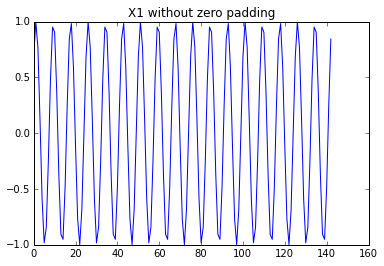

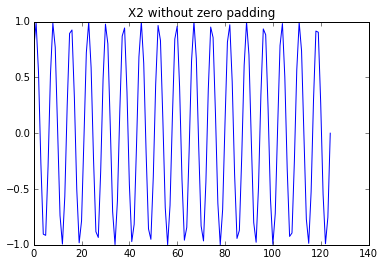

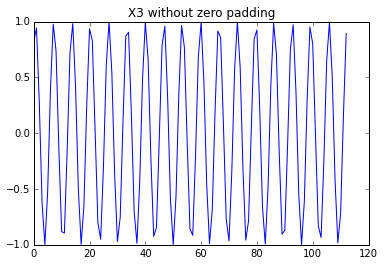

In [177]:
#Creating test signals
## Setup
pi = np.pi
# f1 = 35000 #Frequency of first pulse
# f2 = 40000 #Frequency of second pulse
# f3 = 45000 #Frequency of third pulse
# Fs = 300000 #Samlpling frequency, Should be no poblem to change this
#Fs = 2*f1

#creating sines of length t with the different frequencies
#t = [0:1/Fs:1]
t = np.arange(0, 1, 1./Fs)

x1 = np.sin(2*pi*f1*t)
x2 = np.sin(2*pi*f2*t)
x3 = np.sin(2*pi*f3*t)

#Choosing number of elements from x1, x2 and x3 to create pulse of certain
#number of cycles. Needs to be done in a nicer way. 
x1Length = 24*6
x2Length = 21*6
x3Length = 19*6

temp = np.zeros(.1*Fs)

#Putting together a number of pulses and zero padding so all the signals
#has the same number of points
x1Sig = np.concatenate((x1[0:x1Length],temp), axis = 0);
x2Sig = np.concatenate((x2[0:x2Length],temp), axis = 0);
x3Sig = np.concatenate((x3[0:x3Length],temp), axis = 0);


#Plotting the pulses without zero padding
plt.figure()
plt.plot(x1Sig[1:x1Length])
plt.title('X1 without zero padding')
plt.figure()
plt.plot(x2Sig[1:x2Length])
plt.title('X2 without zero padding')
plt.figure()
plt.plot(x3Sig[1:x3Length])
plt.title('X3 without zero padding')
#plt.show()


In [178]:
def genSamples(Fs, freq, n):
    # Fs = sps, freq = sine wave freq, n is number of cycles
    # returns n cycles of samples as xsig
    
    rad = np.linspace(0, n*2*np.pi, (n*Fs)/freq)
    xsig = np.sin(rad)
    
    return xsig

Designing filters...
Done
The number of points is  500
Samples per second is  250000


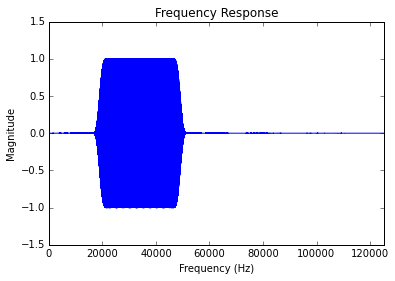

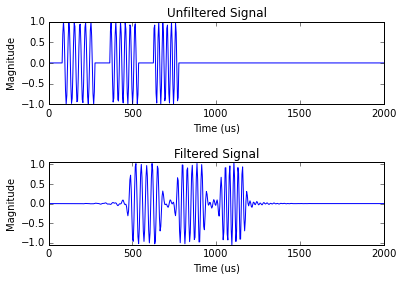

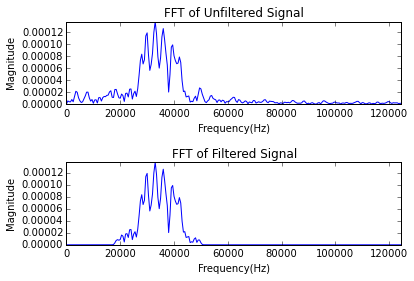

Time to evaluate filter: 1413.106918334961 us


In [179]:
# h = [0.000889391454733145, 0.000808236768945616, -0.000910333473145078, -0.00189364342561422, -0.000561282128644839, 0.00238658555092604, 0.00248405123291128, -0.000715247458004567, -0.00328505939596145, -0.00149530633876708, 0.00164874217293225, 0.00189504834400762, 1.11874228307383e-05, 0.000208736898276242, 0.00133486207822560, -0.00109223378267695, -0.00530364874233792, -0.00291577005278782, 0.00637970761818405, 0.00998151379300436, -0.000329947758124196, -0.0125888156586640, -0.00930724550342489, 0.00629687989525885, 0.0132219494058328, 0.00336363531924705, -0.00758404369356272, -0.00581021046804391, 0.000427426136088345, -0.000979713008174254, -0.00303718269147988, 0.00576568325212989, 0.0143902306941538, 0.00291385308960260, -0.0195158340156996, -0.0199829742826965, 0.00754065611453010, 0.0267641400437302, 0.0114182947762631, -0.0144428093113171, -0.0154169254736620, -0.000249257650535012, -0.000142444069219341, -0.00789740676854597, 0.00937448468570990, 0.0373555365385171, 0.0176076344854300,-0.0502365595988475, -0.0730391914197814, 0.00907946329488766, 0.105615288311895, 0.0748064224604209, -0.0673358378393079, -0.138546562616726, -0.0317972926206872, 0.122882155306267, 0.122882155306267, -0.0317972926206872, -0.138546562616726, -0.0673358378393079, 0.0748064224604209, 0.105615288311895, 0.00907946329488766, -0.0730391914197814, -0.0502365595988475, 0.0176076344854300, 0.0373555365385171, 0.00937448468570990, -0.00789740676854597, -0.000142444069219341, -0.000249257650535012, -0.0154169254736620, -0.0144428093113171, 0.0114182947762631, 0.0267641400437302, 0.00754065611453010, -0.0199829742826965, -0.0195158340156996, 0.00291385308960260, 0.0143902306941538, 0.00576568325212989, -0.00303718269147988, -0.000979713008174254, 0.000427426136088345, -0.00581021046804391, -0.00758404369356272, 0.00336363531924705, 0.0132219494058328, 0.00629687989525885, -0.00930724550342489, -0.0125888156586640, -0.000329947758124196, 0.00998151379300436, 0.00637970761818405, -0.00291577005278782, -0.00530364874233792, -0.00109223378267695, 0.00133486207822560, 0.000208736898276242, 1.11874228307383e-05, 0.00189504834400762, 0.00164874217293225, -0.00149530633876708, -0.00328505939596145, -0.000715247458004567, 0.00248405123291128, 0.00238658555092604, -0.000561282128644839, -0.00189364342561422, -0.000910333473145078, 0.000808236768945616, 0.000889391454733145]


print ("Designing filters...")

centerFreq = f2
pbw = 30000; # Passband width in hertz
fOrder = 200; # Filter order number
h = frikkFilterDesigner( centerFreq, pbw, fOrder, Fs );

print ("Done")

# n = number of cycles
n = 6

xsig1 = genSamples(Fs, f1, n)

xsig2 = genSamples(Fs, f2, n)

xsig3 = genSamples(Fs, f3, n)


dataList = np.zeros(500)

iend = 20 + len(xsig1)

for i in range (20, iend):
    dataList[i] = xsig1[i-20]
    
istart = iend + 1
iend = istart + 20 + len(xsig2)

for i in range (20 + istart, iend):
    dataList[i] = xsig2[i-istart-20]
    
istart = iend + 1
iend = istart + 20 + len(xsig3)


for i in range (20 + istart, iend):
    dataList[i] = xsig3[i-istart-20]


dd=[1]

print ('The number of points is ', len(dataList))

print ('Samples per second is ', Fs)
    
evaluate(h, dataList, dd, Fs)